**DATASET LINK** https://drive.google.com/drive/folders/1C8kZeA0_kwlQG2Oxd3pPqI4I34Fikogi?usp=sharing

#  Data engineering with Titanic Dataset


## Machine Learning Workflow

1. Define Problem
1. Specify Inputs & Outputs
1. Exploratory Data Analysis
1. Data Collection
1. Data Preprocessing
1. Data Cleaning
1. Visualization
1. Model Design, Training, and Offline Evaluation
1. Model Deployment, Online Evaluation, and Monitoring
1. Model Maintenance, Diagnosis, and Retraining


## Các đặc trưng của tập dữ liệu
Tàu Titanic bị đắm vào **15 tháng 4 năm 1912**, làm chết **1502 / 2224** hành khách và thủy thủ

Trong tập dữ liệu về tàu Titanic này, chúng ta sẽ có **12 đặc trưng như sau**:

Variable | Name	Description 
--- | --- 
Survived |	Survived (1) or died (0)
Pclass |	Passenger's class
Name	| Passenger's name
Sex	| Passenger's sex
Age	| Passenger's age
SibSp	| Number of siblings/spouses aboard
Parch	| Number of parents/children aboard
Ticket	| Ticket number
Fare	| Fare
Cabin	| Cabin
Embarked	| Port of embarkation

Chi tiết: https://www.kaggle.com/c/titanic/data



In [ ]:
import warnings
import json
import sys
import csv
import os


import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import scipy
import numpy as np
np.random.seed(1612)

In [ ]:
sns.set(style='white', context='notebook', palette='deep')
warnings.filterwarnings('ignore')
mpl.style.use('ggplot')
sns.set_style('white')
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Exploratory Data Analysis(EDA)
*   Data Collection
*   Visualization
*   Data Preprocessing
*   Data Cleaning

<img src="http://s9.picofile.com/file/8338476134/EDA.png">

## Data Collection
Đây là quá trình thu thập bất kì dữ liệu nào đáng chú ý, có tiềm năng giải đáp vấn đầ của chúng ta.

In [ ]:
df_train = pd.read_csv('/content/drive/My Drive/Colab Notebooks/AI Practitioner - 2020/Files/titanic/train.csv')
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df_test= pd.read_csv('/content/drive/My Drive/Colab Notebooks/AI Practitioner - 2020/Files/titanic/test.csv')
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


><font color="red"><b>Note: </b></font>

* Cách gọi khác của 1 dòng **dòng**: observation, sample, example, instance, record
* Cách gọi khác của 1 **cột**: feature, attribute

Cách xem ngẫu nhiên một vài dòng trong tập dữ liệu

In [ ]:
df_train.sample(5) 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
637,638,0,2,"Collyer, Mr. Harvey",male,31.0,1,1,C.A. 31921,26.2500,NaN,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
396,397,0,3,"Olsson, Miss. Elina",female,31.0,0,0,350407,7.8542,NaN,S
363,364,0,3,"Asim, Mr. Adola",male,35.0,0,0,SOTON/O.Q. 3101310,7.0500,NaN,S
602,603,0,1,"Harrington, Mr. Charles H",male,NaN,0,0,113796,42.4000,NaN,S


Xem qua thống kê sơ bộ của các cột bằng describe()

In [ ]:
df_train.describe() 

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200



## Visualization


**Lọc ra những giá trị có thể xuất hiện trong từng cột**

TÌm những cột theo giá trị categorical (PClass) thay vì continuous (price).

In [ ]:
# 1. Print out all unique values

print('Pclass unique values: ', df_train.Pclass.unique())
print('SibSp unique values: ', df_train.SibSp.unique())
print('Parch unique values: ', df_train.Parch.unique())
print('Sex unique values: ', df_train.Sex.unique())
print('Cabin unique values: ', df_train.Cabin.unique())

Pclass unique values:  [3 1 2]
SibSp unique values:  [1 0 3 4 2 5 8]
Parch unique values:  [0 1 2 5 3 4 6]
Sex unique values:  ['male' 'female']
Cabin unique values:  [nan 'C85' 'C123' 'E46' 'G6' 'C103' 'D56' 'A6' 'C23 C25 C27' 'B78' 'D33'
 'B30' 'C52' 'B28' 'C83' 'F33' 'F G73' 'E31' 'A5' 'D10 D12' 'D26' 'C110'
 'B58 B60' 'E101' 'F E69' 'D47' 'B86' 'F2' 'C2' 'E33' 'B19' 'A7' 'C49'
 'F4' 'A32' 'B4' 'B80' 'A31' 'D36' 'D15' 'C93' 'C78' 'D35' 'C87' 'B77'
 'E67' 'B94' 'C125' 'C99' 'C118' 'D7' 'A19' 'B49' 'D' 'C22 C26' 'C106'
 'C65' 'E36' 'C54' 'B57 B59 B63 B66' 'C7' 'E34' 'C32' 'B18' 'C124' 'C91'
 'E40' 'T' 'C128' 'D37' 'B35' 'E50' 'C82' 'B96 B98' 'E10' 'E44' 'A34'
 'C104' 'C111' 'C92' 'E38' 'D21' 'E12' 'E63' 'A14' 'B37' 'C30' 'D20' 'B79'
 'E25' 'D46' 'B73' 'C95' 'B38' 'B39' 'B22' 'C86' 'C70' 'A16' 'C101' 'C68'
 'A10' 'E68' 'B41' 'A20' 'D19' 'D50' 'D9' 'A23' 'B50' 'A26' 'D48' 'E58'
 'C126' 'B71' 'B51 B53 B55' 'D49' 'B5' 'B20' 'F G63' 'C62 C64' 'E24' 'C90'
 'C45' 'E8' 'B101' 'D45' 'C46' 'D30

**Đếm số lượng unique value**

In [ ]:
print(df_train['Pclass'].value_counts())
print(df_train['SibSp'].value_counts())
print(df_train['Parch'].value_counts())
# Ko in Cabin vì quá nhiều

3    491
1    216
2    184
Name: Pclass, dtype: int64
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64


In [ ]:
print(df_train['Sex'].value_counts())

male      577
female    314
Name: Sex, dtype: int64


### Count Plot

**Survived vs Sex**

Text(0.5, 1.0, 'Number of passengers Survived by Sex')

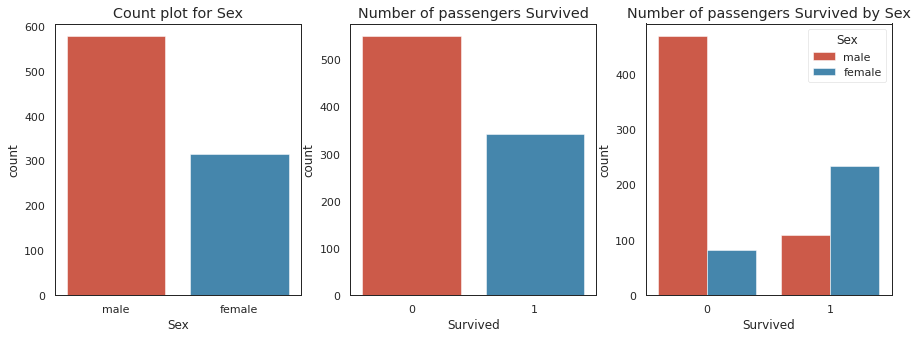

In [ ]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sns.countplot(df_train.Sex)
plt.title('Count plot for Sex')

plt.subplot(1,3,2)
sns.countplot(df_train.Survived) # truyền DataFrame.Column Name
plt.title('Number of passengers Survived')

plt.subplot(1,3,3)
sns.countplot(x="Survived", hue="Sex", data=df_train)
plt.title('Number of passengers Survived by Sex')

**Survived vs Pclass**

Text(0.5, 1.0, 'Number of passengers Survived by Pclass')

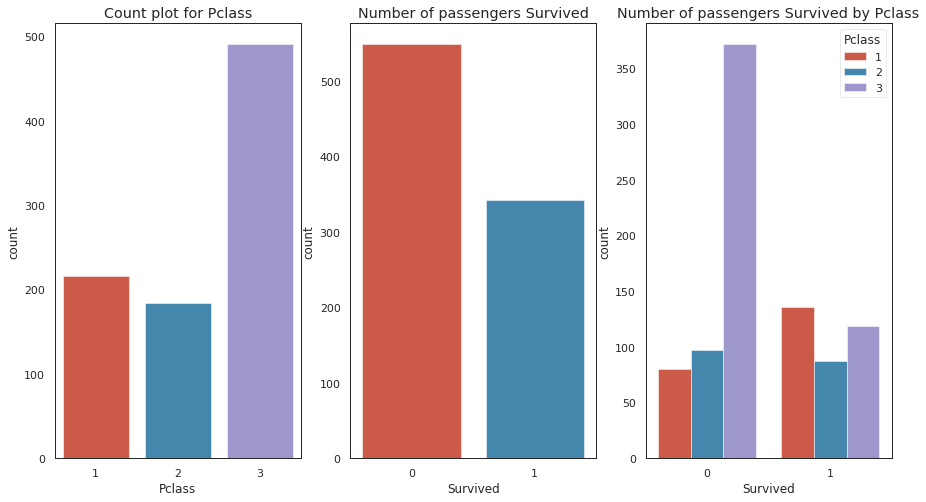

In [ ]:
plt.figure(figsize=(15,8))
plt.subplot(1,3,1)
sns.countplot(df_train.Pclass)
plt.title('Count plot for Pclass')

plt.subplot(1,3,2)
sns.countplot(df_train.Survived) # truyền DataFrame.Column Name
plt.title('Number of passengers Survived')

plt.subplot(1,3,3)
sns.countplot(x='Survived', hue='Pclass', data=df_train)
plt.title('Number of passengers Survived by Pclass')

### Scatter Plot

[Scatter plot](https://en.wikipedia.org/wiki/Scatter_plot) Xác định quan hệ giữa 2 đặc trưng.



**Survived vs Pclass vs Fare vs Age**

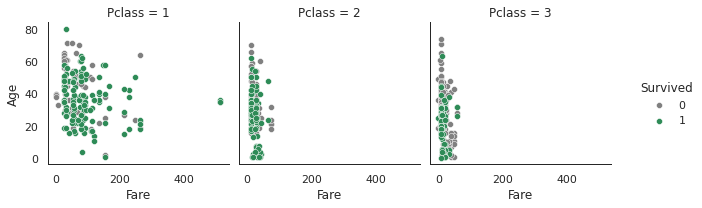

In [ ]:
#https://seaborn.pydata.org/generated/seaborn.FacetGrid.html

g = sns.FacetGrid(df_train, hue="Survived", col="Pclass", margin_titles=True,
                  palette={1:"seagreen", 0:"gray"}) 
g=g.map(plt.scatter, "Fare", "Age", edgecolor="w").add_legend();

**Survived vs Pclass vs SibSp vs Parch**

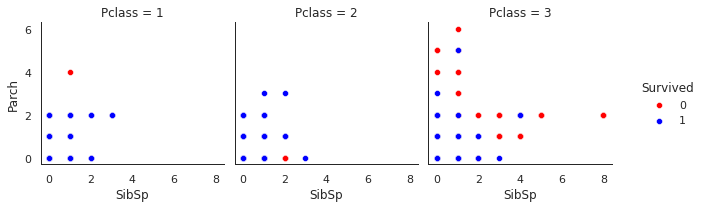

In [ ]:
f = sns.FacetGrid(df_train, hue='Survived', col='Pclass', margin_titles=True,
                  palette={1:'blue', 0:'red'})
f = f.map(plt.scatter, 'SibSp', 'Parch', edgecolor='w').add_legend();


### Box
Box là phương pháp mô ta dữ liệu số thông qua những phần tư của chúng.
Chi tiết: 
- https://www.khanacademy.org/math/statistics-probability/summarizing-quantitative-data/box-whisker-plots/a/box-plot-review
- https://www.khanacademy.org/math/statistics-probability/summarizing-quantitative-data/box-whisker-plots/a/identifying-outliers-iqr-rule
<img src="https://miro.medium.com/max/13500/1*2c21SkzJMf3frPXPAR_gZA.png">


**Example**

![boxplot](https://i.imgur.com/Mcw6vXv.png)

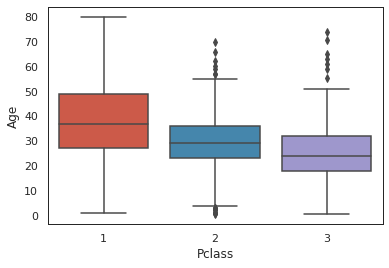

In [ ]:
ax= sns.boxplot(x="Pclass", y="Age", data=df_train)
plt.show()
# Nhiễu thì xoá dòng or thay bằng min or max của data đó


### Histogram

<Figure size 432x288 with 0 Axes>

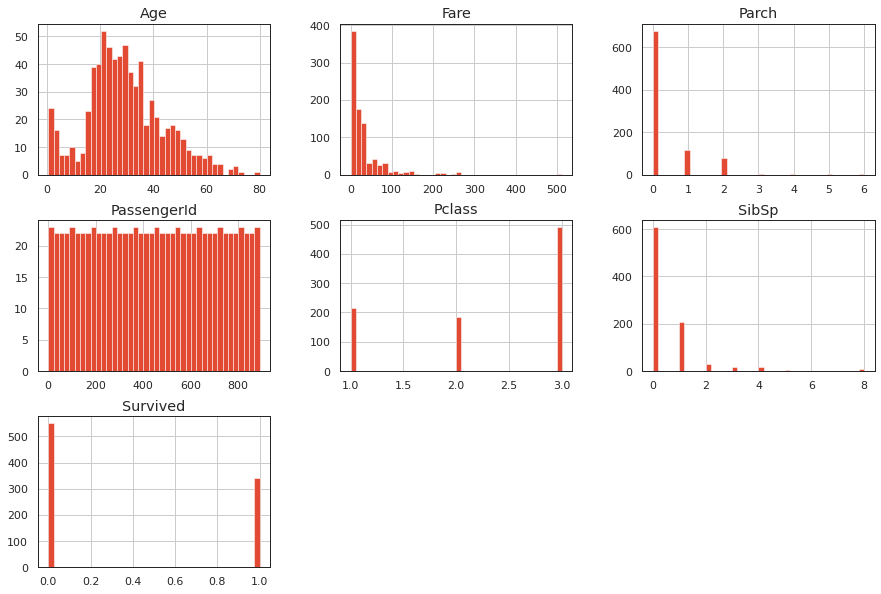

<Figure size 432x288 with 0 Axes>

In [ ]:
# histograms
df_train.hist(figsize=(15,10),bins=40)
plt.figure()

### Correlation Heatmap

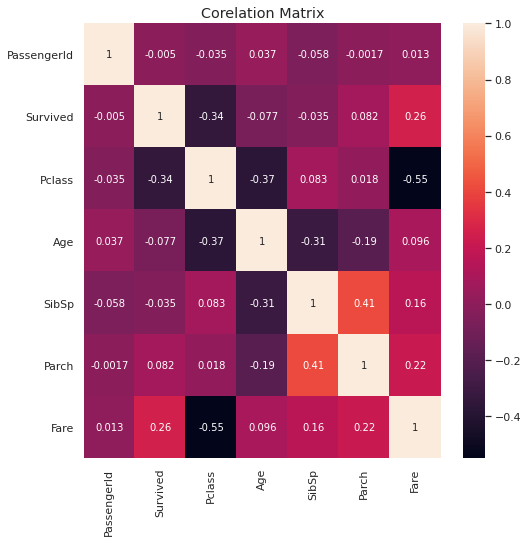

In [ ]:
# 1. Find correlation matrix using df.corr()
# 2. Plot heatmap
plt.figure(figsize=(8,8))
sns.heatmap(df_train.corr(), annot=True) # corr() only used for DataFrame
plt.title('Corelation Matrix');

## Data Preprocessing
**Data preprocessing** là kĩ thuật chuẩn hóa, làm sạch dữ liệu trước khi đưa vào thuật toán.
Một vài bước tiêu biểu của Data preprocessing:
* Xử lý dữ liệu không cân bằng
* Xử lý dữ liệu bị thiếu Nan
* Xử lý nhiễu (https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba)
* Chuẩn hóa dữ liệu (https://medium.com/@urvashilluniya/why-data-normalization-is-necessary-for-machine-learning-models-681b65a05029) Scaling
* Chọn lọc đặc trưng (https://medium.com/analytics-vidhya/feature-selection-using-scikit-learn-5b4362e0c19b)

 ## Types of features
Features:
* số 
* theo từng mục (category)
* ngày tháng (datetime)

### Hãy xác định dạng đặc trưng trong tập dữ liệu:


In [ ]:
# 1. check data type of each columns
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Data exploration

In [ ]:
# shape
print(df_train.shape)

(891, 12)


>  <font color="red"><b>Note:</b></font>
how many NA elements in every column


In [ ]:
df_train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
# Check how many Null elements per column
# Do hạng thấp ko đc đánh số Cabin nên Nul nhiều. Chỉ hạng cao có số Cabin
# Cabin vị trí thì có thể quan trọng. Nhưng xử lý nó dài nên bài này xoá Cabin
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
# 1. Check null on df_train and df_test
df_test.isnull()
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

**Xóa cột**

In [ ]:
# 1. Drop 4 columns Embarked, PassengerId, Cabin, Ticket
df_train = df_train.drop(columns = ['Embarked', 'PassengerId', 'Cabin', 'Ticket'])
df_test = df_test.drop(columns = ['Embarked', 'PassengerId', 'Cabin', 'Ticket'])

In [ ]:
df_train.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500


In [ ]:
df_test.head(5)

,Pclass,Name,Sex,Age,SibSp,Parch,Fare
0,3,"Kelly, Mr. James",male,34.5,0,0,7.8292
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000
2,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875
3,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875


**Xóa những dòng có giá trị NA**

In [ ]:
# remove rows that have NA's # do chỉ có 1 dòng # drop những dòng bị null
# df_test['Fare'] = df_test['Fare'].dropna() # incorrect
df_test.dropna(subset=['Fare'],inplace=True) # !!! phải là subset rồi truyền vào column name

In [ ]:
# Remove all rows having Nan
# df_test.dropna(inplace=True)

**Replace giá trị NA bằng giá trị khác**

Replace bằng trung vị or trung bình của cái Class đó. Dựa theo heatmap để đánh giá.

In [ ]:
# Left: return location of Nulls in Age column. Right: groupby theo nhóm Pclass, transform Nulls trong Age bằng median Age theo / của Pclass (do Pclass có corr lớn nhất vs Age)
df_train.loc[df_train.Age.isnull(), 'Age'] = df_train.groupby("Pclass").Age.transform('median')

df_test.loc[df_test.Age.isnull(), 'Age'] = df_test.groupby("Pclass").Age.transform('median')

In [ ]:
df_train.isnull()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False
887,False,False,False,False,False,False,False,False
888,False,False,False,False,False,False,False,False
889,False,False,False,False,False,False,False,False


In [ ]:
df_train.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
dtype: int64

In [ ]:
df_test.isnull()

,Pclass,Name,Sex,Age,SibSp,Parch,Fare
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
413,False,False,False,False,False,False,False
414,False,False,False,False,False,False,False
415,False,False,False,False,False,False,False
416,False,False,False,False,False,False,False


In [ ]:
df_test.isnull().sum()

Pclass    0
Name      0
Sex       0
Age       0
SibSp     0
Parch     0
Fare      0
dtype: int64

## Feature transformations
Chúng ta sẽ chuyển đổi dữ liệu sang một dạng mới với kì vọng sẽ đem lại giá trị tốt hơn cho việc phân tích, đưa ra quyết định
Ở đây chúng ta sẽ biến đổi:
1. Name
1. Age
1. SibSp & Parch



**Transform Name**

In [ ]:
df_train['Name'].head(10)

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
5                                     Moran, Mr. James
6                              McCarthy, Mr. Timothy J
7                       Palsson, Master. Gosta Leonard
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                  Nasser, Mrs. Nicholas (Adele Achem)
Name: Name, dtype: object

In [ ]:
df_train['Name'] = df_train.Name.str.extract(' ([A-Za-z]+)\.', expand = False)
df_test['Name'] = df_test.Name.str.extract(' ([A-Za-z]+)\.', expand = False)

In [ ]:
df_train['Name'].unique().tolist()

['Mr',
 'Mrs',
 'Miss',
 'Master',
 'Don',
 'Rev',
 'Dr',
 'Mme',
 'Ms',
 'Major',
 'Lady',
 'Sir',
 'Mlle',
 'Col',
 'Capt',
 'Countess',
 'Jonkheer']

In [ ]:
df_train.rename(columns={'Name' : 'Title'}, inplace=True)
df_train['Title'] = df_train['Title'].replace(['Rev', 'Dr', 'Col', 'Ms', 'Mlle', 'Major', 'Countess', 
                                       'Capt', 'Dona', 'Jonkheer', 'Lady', 'Sir', 'Mme', 'Don'], 'Other')
# Còn lại là Other                                      
df_test.rename(columns={'Name' : 'Title'}, inplace=True)
df_test['Title'] = df_test['Title'].replace(['Rev', 'Dr', 'Col', 'Ms', 'Mlle', 'Major', 'Countess', 
                                       'Capt', 'Dona', 'Jonkheer', 'Lady', 'Sir', 'Mme', 'Don'], 'Other')

In [ ]:
df_train.Title.value_counts()

Mr        517
Miss      182
Mrs       125
Master     40
Other      27
Name: Title, dtype: int64

**Transform Age**

In [ ]:
# Gom nhóm 
bins = (0, 5, 12, 18, 25, 35, 60, 120)
group_names = [ 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
categories = pd.cut(df_train.Age, bins, labels=group_names)
df_train.Age = categories
df_test.Age = categories

In [ ]:
df_train.Age.value_counts()

Student        298
Adult          225
Young Adult    207
Teenager        70
Baby            44
Child           25
Senior          22
Name: Age, dtype: int64

**Transform SibSp & Parch**

In [ ]:
# +1 là người đc count
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1
df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch'] + 1

In [ ]:
df_train = df_train.drop(columns=['SibSp','Parch'])
df_test = df_test.drop(columns=['SibSp','Parch'])

In [ ]:
df_train.FamilySize

0      2
1      2
2      1
3      2
4      1
      ..
886    1
887    1
888    4
889    1
890    1
Name: FamilySize, Length: 891, dtype: int64

## Feature Encoding

Apply One Hot Encoding for all categorical columns

In [ ]:
df_train.head()

,Survived,Pclass,Title,Sex,Age,Fare,FamilySize
0,0,3,Mr,male,Student,7.2500,2
1,1,1,Mrs,female,Adult,71.2833,2
2,1,3,Miss,female,Young Adult,7.9250,1
3,1,1,Mrs,female,Young Adult,53.1000,2
4,0,3,Mr,male,Young Adult,8.0500,1


**Encode Sex column**

In [ ]:
# One hot encoding for 2 values
df_train['Sex'] = df_train['Sex'].map({'male':1,'female':0})
df_test['Sex'] = df_test['Sex'].map({'male':1,'female':0})

In [ ]:
df_train.head()

,Survived,Pclass,Title,Sex,Age,Fare,FamilySize
0,0,3,Mr,1,Student,7.2500,2
1,1,1,Mrs,0,Adult,71.2833,2
2,1,3,Miss,0,Young Adult,7.9250,1
3,1,1,Mrs,0,Young Adult,53.1000,2
4,0,3,Mr,1,Young Adult,8.0500,1


**Encode other columns**

In [ ]:
# One hot encoding for more than 2 values: use get_dummies
df_train = pd.get_dummies(df_train)
df_test = pd.get_dummies(df_test)
df_train.head()

,Survived,Pclass,Sex,Fare,FamilySize,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other,Age_Baby,Age_Child,Age_Teenager,Age_Student,Age_Young Adult,Age_Adult,Age_Senior
0,0,3,1,7.2500,2,0,0,1,0,0,0,0,0,1,0,0,0
1,1,1,0,71.2833,2,0,0,0,1,0,0,0,0,0,0,1,0
2,1,3,0,7.9250,1,0,1,0,0,0,0,0,0,0,1,0,0
3,1,1,0,53.1000,2,0,0,0,1,0,0,0,0,0,1,0,0
4,0,3,1,8.0500,1,0,0,1,0,0,0,0,0,0,1,0,0


## Prepare dataset

**Lấy ra label y**

In [ ]:
# 1. get y from column Suvived
# 2. drop column Survived
y = df_train.Survived
df_train = df_train.drop(columns=['Survived'])

In [ ]:
df_train.head(5)

,Pclass,Sex,Fare,FamilySize,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other,Age_Baby,Age_Child,Age_Teenager,Age_Student,Age_Young Adult,Age_Adult,Age_Senior
0,3,1,7.2500,2,0,0,1,0,0,0,0,0,1,0,0,0
1,1,0,71.2833,2,0,0,0,1,0,0,0,0,0,0,1,0
2,3,0,7.9250,1,0,1,0,0,0,0,0,0,0,1,0,0
3,1,0,53.1000,2,0,0,0,1,0,0,0,0,0,1,0,0
4,3,1,8.0500,1,0,0,1,0,0,0,0,0,0,1,0,0


**Train / Validation Split**

In [ ]:
# test_size=0.3 and stratify=y
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(df_train, y, test_size=0.3, stratify=y, shuffle=True, random_state=1612)   
print('Shape of X train', X_train.shape)
print('Shape of y train', y_train.shape)
print('Shape of X val', X_val.shape)
print('Shape of y val', y_val.shape)

Shape of X train (623, 16)
Shape of y train (623,)
Shape of X val (268, 16)
Shape of y val (268,)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, shuffle=True, random_state=1612)   
print('Shape of X train', X_train.shape)
print('Shape of y train', y_train.shape)
print('Shape of X_test', X_test.shape)
print('Shape of y_test', y_test.shape)


**Feature Scaling (MinMaxScaler)**

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
# Muốn dùng MinMaxScaler thì phải lấy cột đó ra reshape, transform lại
fares_train = np.array(X_train['Fare']).reshape(-1, 1)
fares_val = np.array(X_val['Fare']).reshape(-1, 1)
fares_test = np.array(df_test['Fare']).reshape(-1, 1)

X_train['Fare'] = scaler.fit_transform(fares_train)
X_val['Fare']= scaler.transform(fares_val)
df_test['Fare'] = scaler.transform(fares_test)

## 2D Visualization

### PCA giảm chiều dữ liệu cách 1

Hơi cùi bắp

In [ ]:
# 1. import PCA
# 2. Initializa pca with 2 components
# 3. Apply pca on X_train
# 3. Name the new variable df_pca
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

pca = PCA(n_components = 2) # 2D nên number of components = 2
df_pca = pca.fit_transform(X_train)

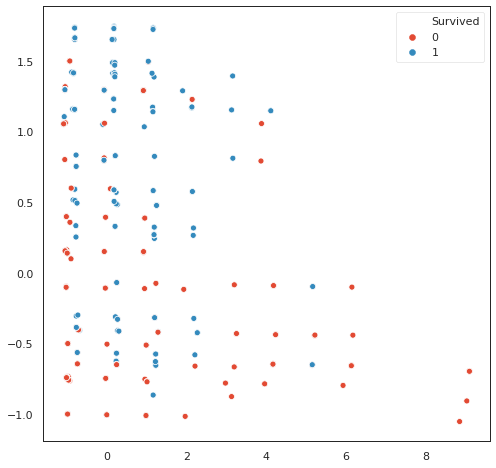

In [ ]:
plt.figure(figsize =(8, 8))
sns.scatterplot(df_pca[:,0], df_pca[:,1], hue=y_train, legend='full') # seaborn hiện đại hơn matplotlib

In [ ]:
print(pca.explained_variance_ratio_)
# Lượng thông tin đc giữ lại chỉ còn 0.56 + 0.16 = 72%

[0.56122445 0.16031097]


### T-SNE giảm xuống 2 chiều cách 2

Visualize vector nhúng Z 

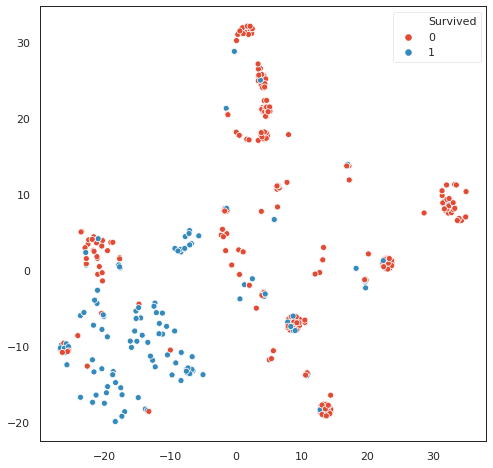

In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE()
df_tsne = tsne.fit_transform(X_train)

plt.figure(figsize =(8, 8))
sns.scatterplot(df_tsne[:,0], df_tsne[:,1], hue=y_train, legend='full')

## Ensemble Model

Tổng hợp nhiều models với nhau

### Logistic Regression

In [ ]:
# 1. Define LogisticRegression model
# 2. Fit on Train
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train) # fit trên cả X, y train

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# Classification thì score có default accuracy
# 1. Use score() function on 2 Set
print('Accuracy on Train Set: ', logreg.score(X_train, y_train))
print('Accuracy on Validation Set: ', logreg.score(X_val, y_val))
# Ko cao lắm. Chỉ đúng trên người sống, còn ng chết thì ko đúng. vẽ confusion matrix ra coi accuracy trêng gì

Accuracy on Train Set:  0.8443017656500803
Accuracy on Validation Set:  0.8059701492537313


### Support Vector Machine

In [ ]:
C_values = [0.01, 0.1, 1] # 0.01 tới 10
gamma_values = [0.01, 0.1, 1]
kernel_values = ['linear', 'poly', 'rbf']

param_grid = {
    'kernel': kernel_values,
    'C': C_values,
    'gamma': gamma_values
}

In [ ]:
# 1. import SVC, GridSearchCV
# 3. khởi tạo GridSearchCV với số k-fold (cv) = 3
# 4. fit trên Train Set 
# 5. lấy ra best model
# 6. 
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

model = SVC(random_state=1612)
grid = GridSearchCV(model, param_grid, cv=2)
grid.fit(X_train, y_train)

svc = grid.best_estimator_

In [ ]:
# 1. Use score() function on 2 Sets
print('Accuracy on Train Set: ', model.score(X_train, y_train))
print('Accuracy on Validation Set: ', model.score(X_val, y_val))

### Decision Tree

In [ ]:
params = {
    'criterion': ['entropy','gini'],
    'max_depth': [3,5,7],
    'min_samples_split': np.linspace(0.1, 1.0, 10), 
    'max_features':  ['auto', 'log2']
}

# 1. import Decision Tree
# 3. khởi tạo GridSearchCV với số k-fold (cv) = 2
# 4. fit trên Train Set 
# 5. lấy ra best model
from sklearn.tree import DecisionTreeClassifier

# grid = GridSearchCV(DecisionTreeClassifier(random_state=1612), params, cv=2, n_jobs=1)
# grid.fit(X_train, y_train)

decision_tree = DecisionTreeClassifier(random_state=1612)
decision_tree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1612, splitter='best')

In [ ]:
# 1. Use score() function on 2 Sets
print('Accuracy on Train Set: ', decision_tree.score(X_train, y_train))
print('Accuracy on Validation Set: ', decision_tree.score(X_val, y_val))

Accuracy on Train Set:  0.9582664526484751
Accuracy on Validation Set:  0.8059701492537313


### Random Forest

In [ ]:
 param_grid_random={'criterion': ['gini', 'entropy'],
            'max_depth': [3, 5, 7],
            'max_features': ['auto', 'log2'],
            'n_estimators': [100, 300, 500]})

# 1. Import RandomForestClassifier
# 2. khởi tạo GridSearchCV với số k-fold (cv) = 2
# 3. fit trên Train Set 
# 4. lấy ra best model



In [ ]:
# 1. Use score() function on 2 Sets


### Voting Classifier

voting = {'hard', 'soft'}

If 'hard', uses predicted class labels for majority rule voting. Else if 'soft', predicts the class label based on the argmax of the sums of the predicted probabilities, which is recommended for an ensemble of well-calibrated classifiers.

Model tune kĩ bằng prob rồi thì dùng soft. Bỏ qua SVM do SVM có output ko phải prob.

In [ ]:
from sklearn.ensemble import VotingClassifier

ensemble = VotingClassifier(estimators=[
                              ('Logistic Regression', logreg), 
                              ('SVM', svc), 
                              ('Decision Tree', decision_tree)],
                            voting='hard',
                            n_jobs=-1) # hard: label nào nhiều thì đc lấy ra # ('Random Forest', random_forest)



ensemble.fit(X_train, y_train)

VotingClassifier(estimators=[('Logistic Regression',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('SVM',
                              SVC(C=1, break_ties=False, cache_size=200,
                                  class_weight=No...
                              DecisionTreeClassifier(ccp_alpha=0.0,
                                          

In [ ]:
# 1. Use score() function on 2 Sets
print('Accuracy on Train Set: ', ensemble.score(X_train, y_train))
print('Accuracy on Validation Set: ', ensemble.score(X_val, y_val))

Accuracy on Train Set:  0.8635634028892456
Accuracy on Validation Set:  0.8134328358208955


**Confusion Matrix**

Text(0.5, 1.0, 'Confusion Matrix')

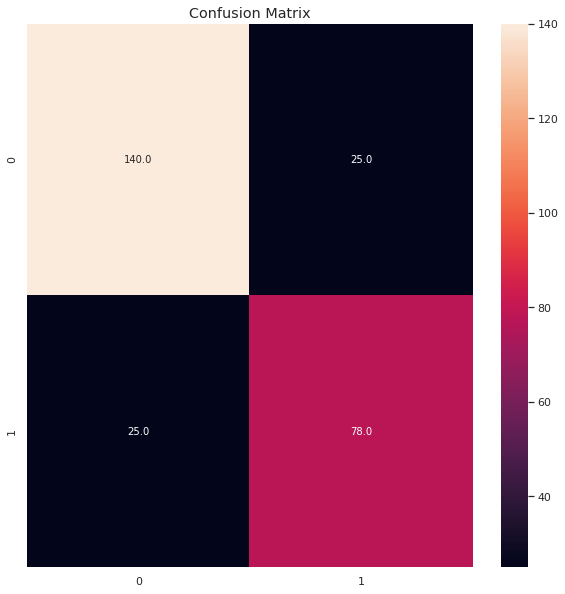

In [ ]:
# 1. Import confusion matrix from sklearn
# 2. Use confusion_matrix to draw a heatmap
# 3. if your heatmap show 8e+2 numbers. Insise heatmap() function, put a parameter fmt='.1f'  
from sklearn.metrics import confusion_matrix
y_pred = ensemble.predict(X_val)
cm = confusion_matrix(y_val, y_pred)
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt='.1f')
plt.title('Confusion Matrix')